In [1]:
# Import libraries (at top of notebook)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

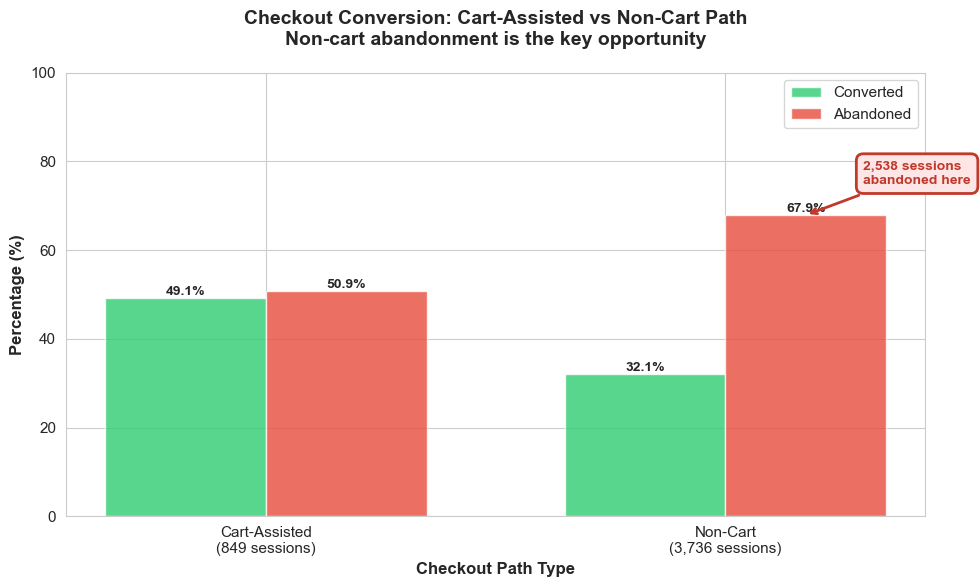

In [6]:
df_checkout = pd.read_csv('exported_data_visualization/chart1_checkout_conversion.csv')

paths = df_checkout['checkout_path'].values
conversion = df_checkout['conversion_rate'].values
abandonment = df_checkout['abandonment_rate'].values
sessions = df_checkout['checkout_sessions'].values

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(paths))
width = 0.35

bars1 = ax.bar(x - width/2, conversion, width, label='Converted', 
               color='#2ecc71', alpha=0.8)
bars2 = ax.bar(x + width/2, abandonment, width, label='Abandoned', 
               color='#e74c3c', alpha=0.8)

ax.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
ax.set_xlabel('Checkout Path Type', fontsize=12, fontweight='bold')
ax.set_title('Checkout Conversion: Cart-Assisted vs Non-Cart Path\nNon-cart abandonment is the key opportunity', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(['Cart-Assisted\n(849 sessions)', 'Non-Cart\n(3,736 sessions)'], fontsize=11)
ax.legend(fontsize=11, loc='upper right')
ax.set_ylim(0, 100)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height, f'{height:.1f}%',
                ha='center', va='bottom', fontsize=10, fontweight='bold')


ax.annotate('2,538 sessions\nabandoned here', 
            xy=(1 + width/2, abandonment[1]), xytext=(1.3, 75),
            fontsize=10, color='#c0392b', fontweight='bold',
            arrowprops=dict(arrowstyle='->', color='#c0392b', lw=2),
            bbox=dict(boxstyle='round,pad=0.5', facecolor='#ffe6e6', edgecolor='#c0392b', lw=2))

plt.tight_layout()
plt.savefig('chart1_checkout_conversion.png', dpi=300, bbox_inches='tight')
plt.show()

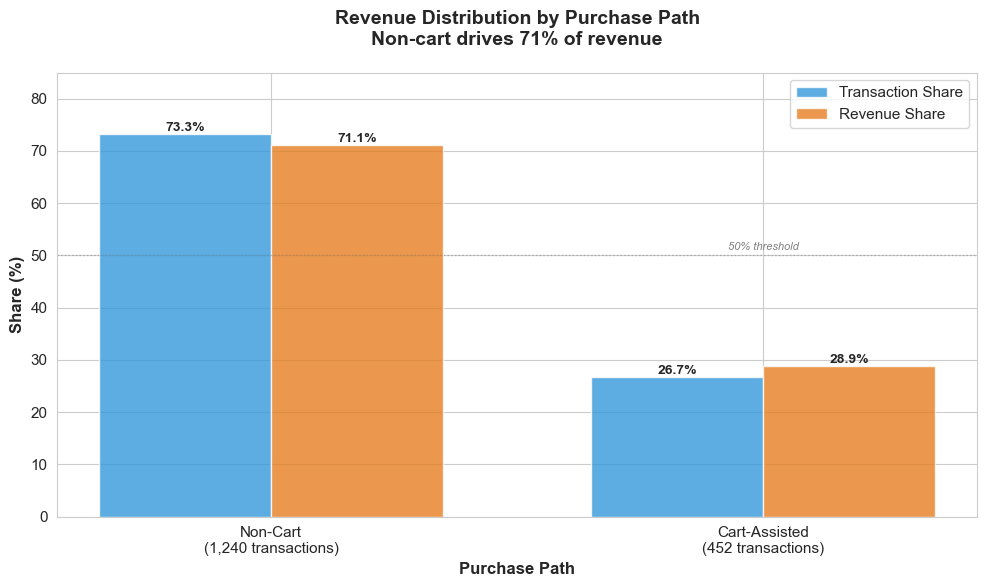

In [7]:
df_revenue = pd.read_csv('exported_data_visualization/chart2_revenue_share.csv')

paths = df_revenue['purchase_path'].values
transaction_share = df_revenue['transaction_share_pct'].values
revenue_share = df_revenue['revenue_share_pct'].values
transactions = df_revenue['total_transactions'].values
revenue = df_revenue['total_revenue'].values

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(paths))
width = 0.35

bars1 = ax.bar(x - width/2, transaction_share, width, label='Transaction Share', 
               color='#3498db', alpha=0.8)
bars2 = ax.bar(x + width/2, revenue_share, width, label='Revenue Share', 
               color='#e67e22', alpha=0.8)

ax.set_ylabel('Share (%)', fontsize=12, fontweight='bold')
ax.set_xlabel('Purchase Path', fontsize=12, fontweight='bold')
ax.set_title('Revenue Distribution by Purchase Path\nNon-cart drives 71% of revenue', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels([f'{path}\n({int(t):,} transactions)' for path, t in zip(paths, transactions)], 
                   fontsize=11)
ax.legend(fontsize=11, loc='upper right')
ax.set_ylim(0, 85)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height, f'{height:.1f}%',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.axhline(y=50, color='gray', linestyle=':', linewidth=1, alpha=0.5)
ax.text(1, 51, '50% threshold', fontsize=8, color='gray', ha='center', style='italic')

plt.tight_layout()
plt.savefig('exported_visualization/chart2_revenue_share.png', dpi=300, bbox_inches='tight')
plt.show()

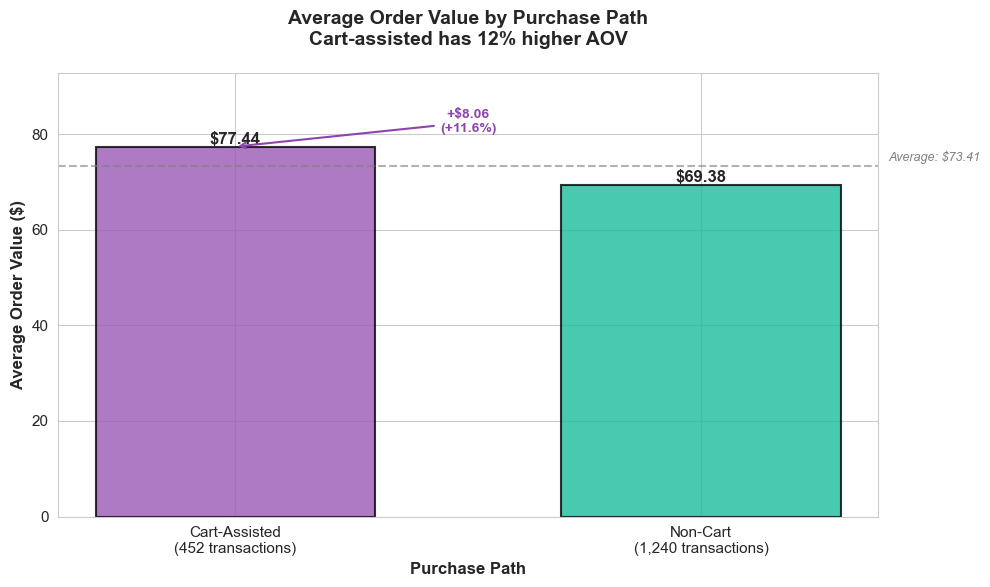

In [9]:
df_aov = pd.read_csv('exported_data_visualization/chart3_aov.csv')

paths = df_aov['purchase_path'].values
aov = df_aov['aov'].values
transactions = df_aov['total_transactions'].values

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(paths))

bars = ax.bar(x, aov, width=0.6, color=['#9b59b6', '#1abc9c'], alpha=0.8, edgecolor='black', linewidth=1.5)

ax.set_ylabel('Average Order Value ($)', fontsize=12, fontweight='bold')
ax.set_xlabel('Purchase Path', fontsize=12, fontweight='bold')
ax.set_title('Average Order Value by Purchase Path\nCart-assisted has 12% higher AOV', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels([f'{path}\n({int(t):,} transactions)' for path, t in zip(paths, transactions)], 
                   fontsize=11)
ax.set_ylim(0, max(aov) * 1.2)

for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height, f'${height:.2f}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')
    
ax.axhline(y=np.mean(aov), color='gray', linestyle='--', linewidth=1.5, alpha=0.6)
ax.text(len(paths)-0.5, np.mean(aov)+1, f'Average: ${np.mean(aov):.2f}', 
        fontsize=9, color='gray', ha='center', style='italic')

difference = aov[0] - aov[1]
pct_diff = (difference / aov[1]) * 100
ax.annotate(f'+${difference:.2f}\n(+{pct_diff:.1f}%)', 
            xy=(0, aov[0]), xytext=(0.5, aov[0] + 3),
            fontsize=10, color='#8e44ad', fontweight='bold', ha='center',
            arrowprops=dict(arrowstyle='->', color='#8e44ad', lw=1.5))

plt.tight_layout()
plt.savefig('exported_visualization/chart3_aov.png', dpi=300, bbox_inches='tight')
plt.show()

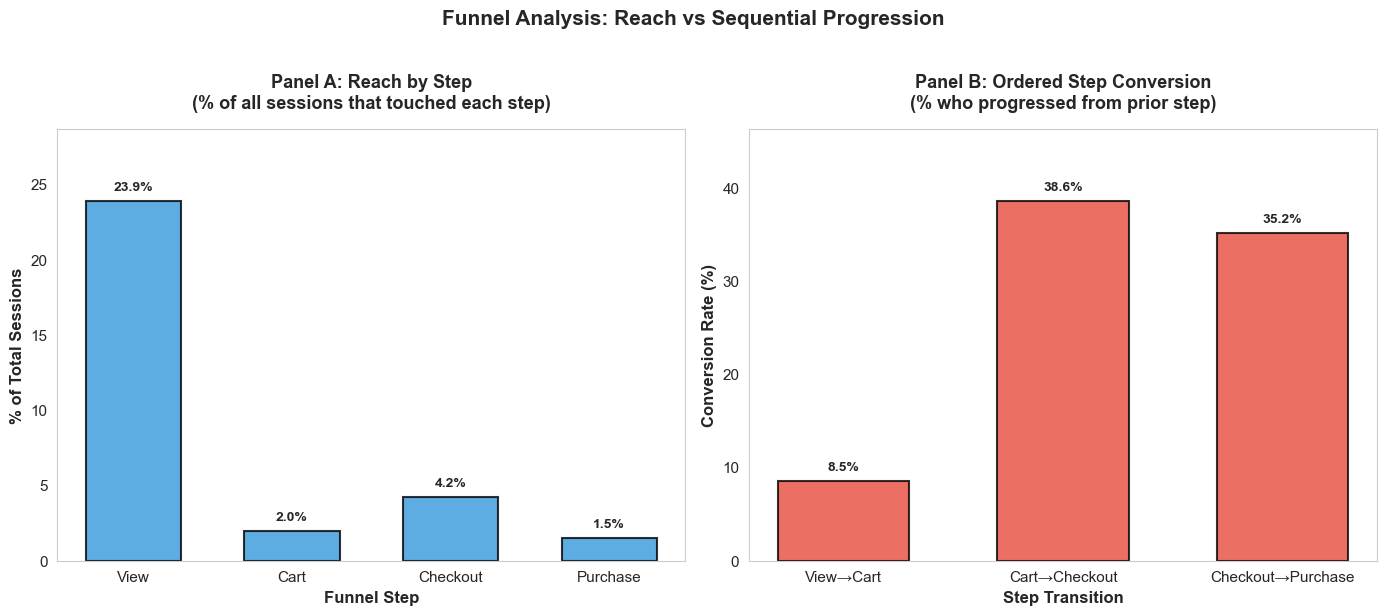

In [11]:
df_funnel = pd.read_csv('exported_data_visualization/chart4_reach_vs_conversion.csv')

steps = df_funnel['step'].values
reach = df_funnel['reach_pct'].values
conversion = df_funnel['conversion_from_prior_pct'].values

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

x = np.arange(len(steps))
width = 0.6

bars1 = ax1.bar(x, reach, width, color='#3498db', alpha=0.8, edgecolor='black', linewidth=1.5)
ax1.set_ylabel('% of Total Sessions', fontsize=12, fontweight='bold')
ax1.set_xlabel('Funnel Step', fontsize=12, fontweight='bold')
ax1.set_title('Panel A: Reach by Step\n(% of all sessions that touched each step)', 
              fontsize=13, fontweight='bold', pad=15)
ax1.set_xticks(x)
ax1.set_xticklabels(steps, fontsize=11)
ax1.set_ylim(0, max(reach) * 1.2)
ax1.grid(False)

for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5, f'{height:.1f}%',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

conversion_filtered = [c for c in conversion if c is not None and not np.isnan(c)]
steps_filtered = [s for s, c in zip(steps[1:], conversion[1:]) if c is not None and not np.isnan(c)]
x2 = np.arange(len(steps_filtered))

bars2 = ax2.bar(x2, conversion_filtered, width, color='#e74c3c', alpha=0.8, edgecolor='black', linewidth=1.5)
ax2.set_ylabel('Conversion Rate (%)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Step Transition', fontsize=12, fontweight='bold')
ax2.set_title('Panel B: Ordered Step Conversion\n(% who progressed from prior step)', 
              fontsize=13, fontweight='bold', pad=15)
ax2.set_xticks(x2)
ax2.set_xticklabels(['View→Cart', 'Cart→Checkout', 'Checkout→Purchase'], fontsize=11)
ax2.set_ylim(0, max(conversion_filtered) * 1.2)
ax2.grid(False)

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.8, f'{height:.1f}%',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.suptitle('Funnel Analysis: Reach vs Sequential Progression', fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('exported_visualization/chart4_reach_vs_conversion.png', dpi=300, bbox_inches='tight')
plt.show()

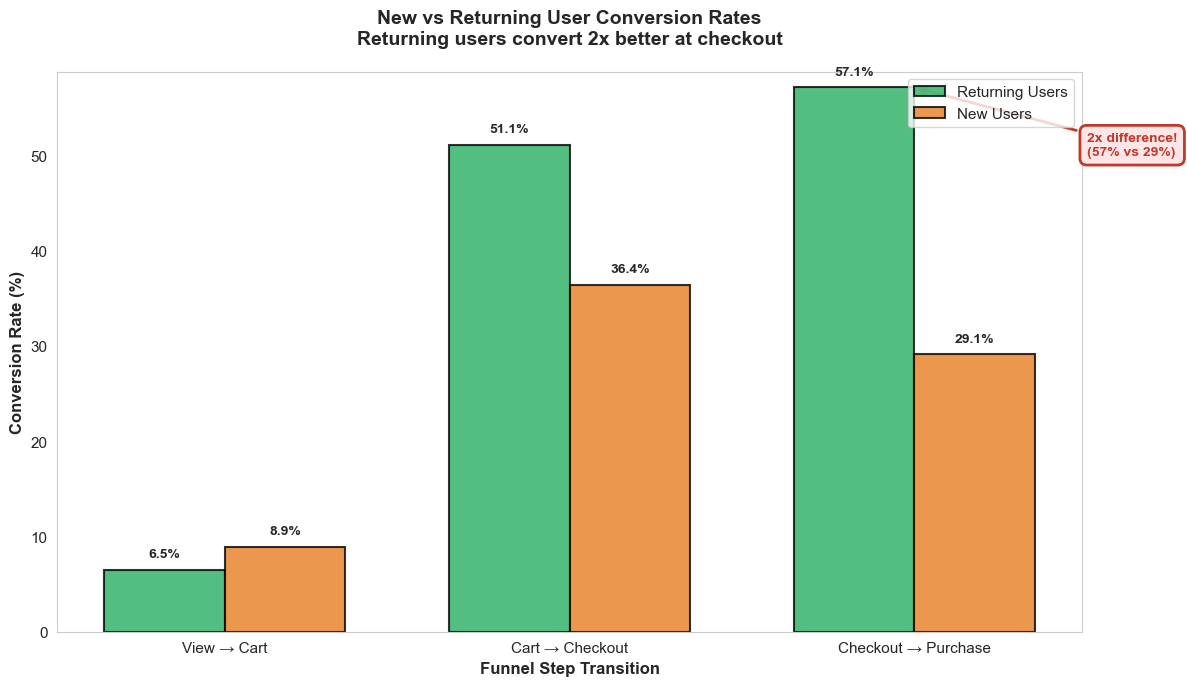

In [12]:
df_user = pd.read_csv('exported_data_visualization/chart5_new_vs_returning.csv')

user_types = df_user['user_type'].values
view_to_cart = df_user['view_to_cart_pct'].values
cart_to_checkout = df_user['cart_to_checkout_pct'].values
checkout_to_purchase = df_user['checkout_to_purchase_pct'].values

fig, ax = plt.subplots(figsize=(12, 7))

x = np.arange(3)
width = 0.35

bars1 = ax.bar(x - width/2, [view_to_cart[0], cart_to_checkout[0], checkout_to_purchase[0]], 
               width, label='Returning Users', color='#27ae60', alpha=0.8, edgecolor='black', linewidth=1.5)
bars2 = ax.bar(x + width/2, [view_to_cart[1], cart_to_checkout[1], checkout_to_purchase[1]], 
               width, label='New Users', color='#e67e22', alpha=0.8, edgecolor='black', linewidth=1.5)

ax.set_ylabel('Conversion Rate (%)', fontsize=12, fontweight='bold')
ax.set_xlabel('Funnel Step Transition', fontsize=12, fontweight='bold')
ax.set_title('New vs Returning User Conversion Rates\nReturning users convert 2x better at checkout', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(['View → Cart', 'Cart → Checkout', 'Checkout → Purchase'], fontsize=11)
ax.legend(fontsize=11, loc='upper right')
ax.set_ylim(0, max(cart_to_checkout) * 1.15)
ax.grid(False)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 1, f'{height:.1f}%',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.annotate('2x difference!\n(57% vs 29%)', 
            xy=(2, checkout_to_purchase[0]), xytext=(2.5, 50),
            fontsize=10, color='#c0392b', fontweight='bold',
            arrowprops=dict(arrowstyle='->', color='#c0392b', lw=2),
            bbox=dict(boxstyle='round,pad=0.5', facecolor='#ffe6e6', edgecolor='#c0392b', lw=2))

plt.tight_layout()
plt.savefig('exported_visualization/chart5_new_vs_returning.png', dpi=300, bbox_inches='tight')
plt.show()